In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import datetime as dt
import time

In [2]:
with open('./edited_data/outliers_collection.json') as f:
    outlier_file = json.load(f)

In [3]:
def set_up_intersection_lists(outlier_file):
    #for each intersection, list the lof values in order of date and hour
    intersections = list(outlier_file.keys())
    data = {}
    weekdays = list(range(7))
    hours = [(dt.time(i).strftime('%H')) for i in range(24)]
    
    for intersection in intersections:
        values = []
        for weekday in weekdays:
            for hour in hours:
                values.extend(outlier_file[intersection][str(weekday)][hour])
        values.sort()
        data[intersection] = values
    return data

In [4]:
def create_dataframe(data,intersection):
    date = [a[0]for a in data[intersection]]
    hour = [a[1]for a in data[intersection]]
    lof = [a[2]for a in data[intersection]]
    high_traffic = [a[3]for a in data[intersection]]
    data = {'date':date,'hour':hour,'lof':lof,'high_traffic':high_traffic}
    df = pd.DataFrame.from_dict(data)
    df['timestamp'] = pd.to_datetime(df['date'] + ' ' + df['hour'])
    df.index=df.timestamp
    return df[['lof','high_traffic']]

In [5]:
data = set_up_intersection_lists(outlier_file)

In [6]:
K302 = create_dataframe(data,'K302')
K173 = create_dataframe(data,'K173')
K414 = create_dataframe(data,'K414')
K158 = create_dataframe(data,'K158')
K402 = create_dataframe(data,'K402')
K305 = create_dataframe(data,'K305')

### Filter only high traffic outliers

In [7]:
K302 = K302[(K302.high_traffic > 0)]
K173 = K173[(K173.high_traffic > 0)]
K414 = K414[(K414.high_traffic > 0)]
K158 = K158[(K158.high_traffic > 0)]
K402 = K402[(K402.high_traffic > 0)]
K305 = K305[(K305.high_traffic > 0)]

# LOF value overviews

## K302

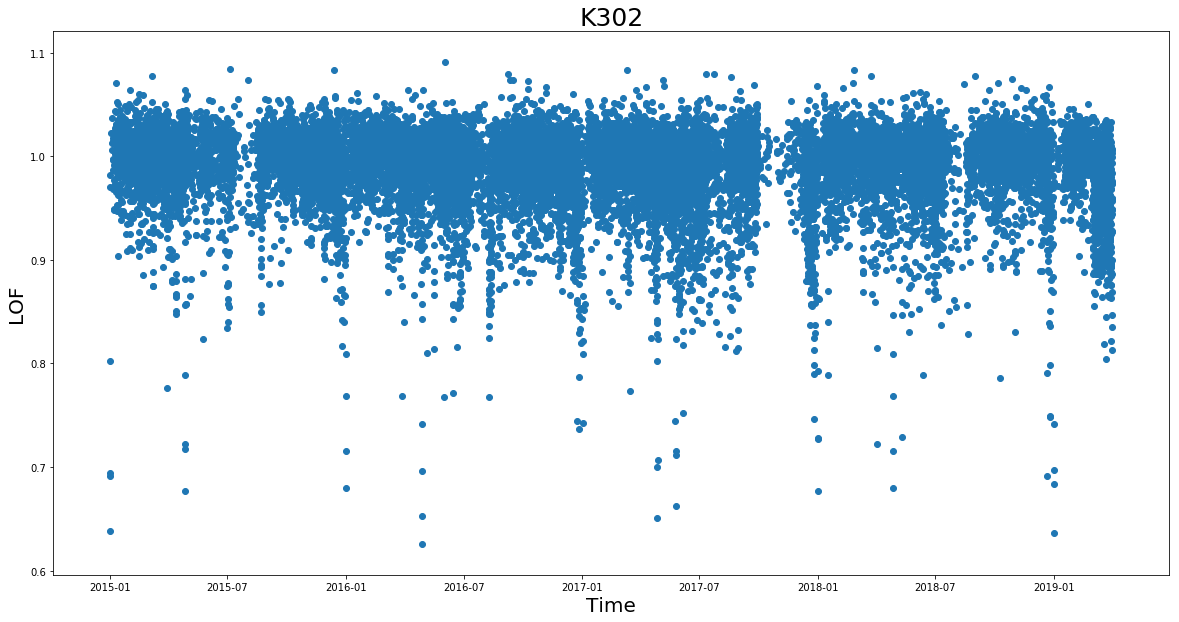

In [8]:
plt.figure(figsize=(20,10))
plt.scatter(K302.index, K302.lof)
plt.title('K302',size=25)
plt.xlabel('Time',size=20)
plt.ylabel('LOF',size=20)
plt.show()

## K173

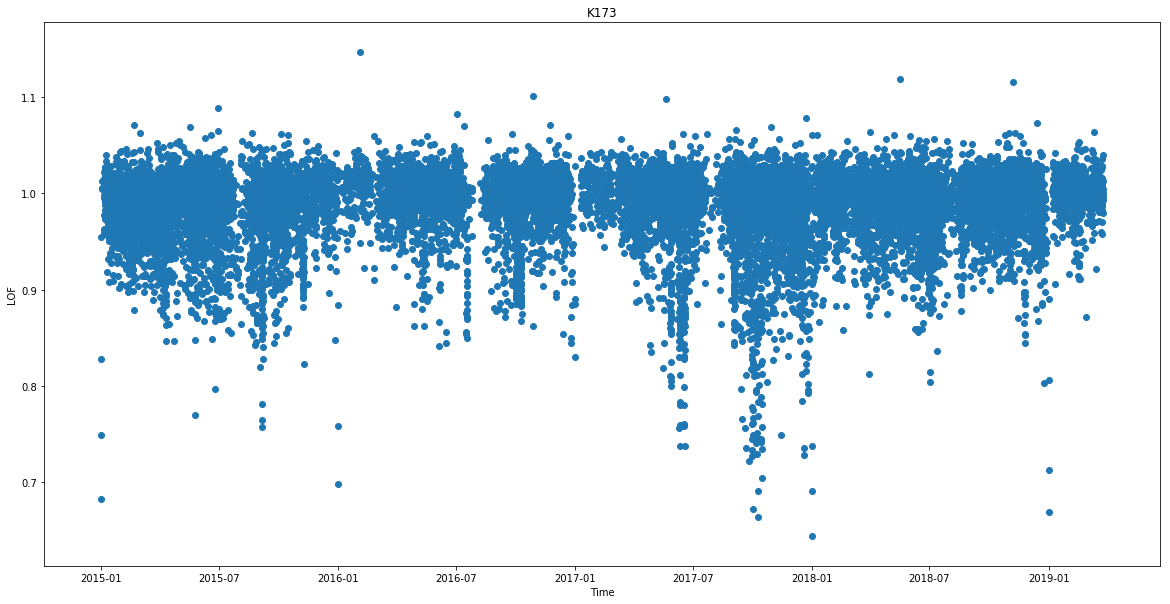

In [9]:
plt.figure(figsize=(20,10))
plt.scatter(K173.index, K173.lof)
plt.title('K173')
plt.xlabel('Time')
plt.ylabel('LOF')
plt.show()

## K414

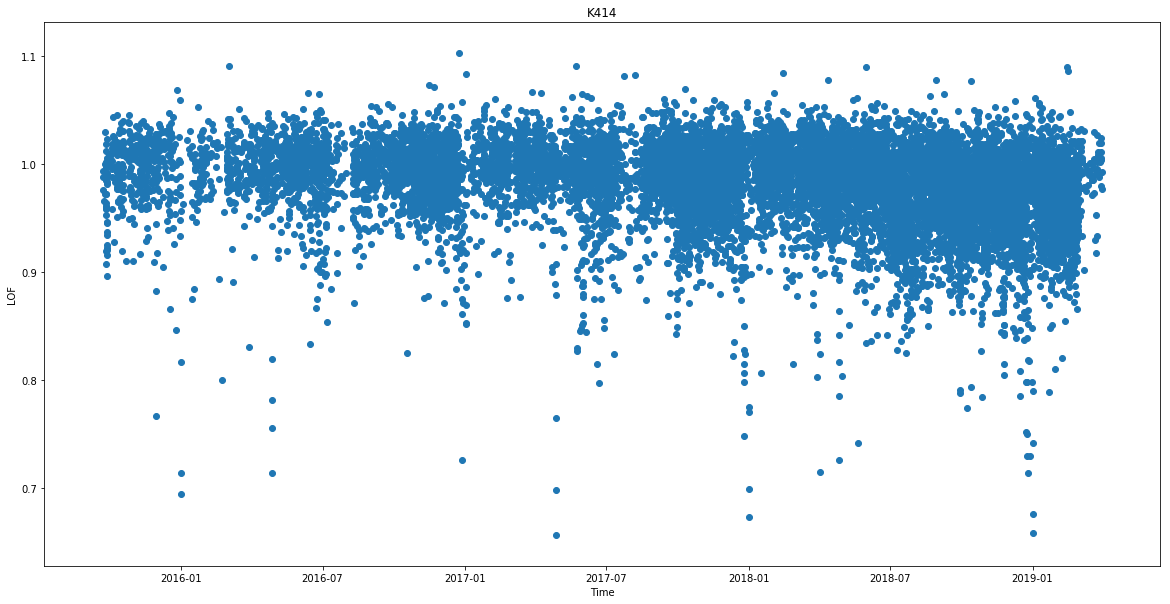

In [10]:
plt.figure(figsize=(20,10))
plt.scatter(K414.index, K414.lof)
plt.title('K414')
plt.xlabel('Time')
plt.ylabel('LOF')
plt.show()

## K158

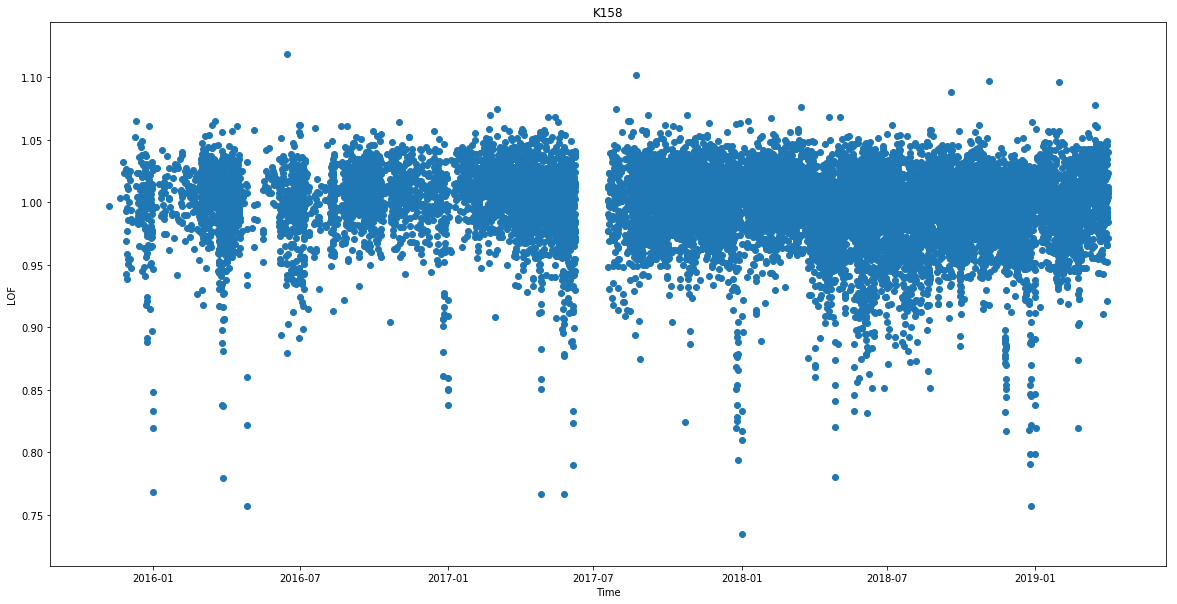

In [11]:
plt.figure(figsize=(20,10))
plt.scatter(K158.index, K158.lof)
plt.title('K158')
plt.xlabel('Time')
plt.ylabel('LOF')
plt.show()

## K402

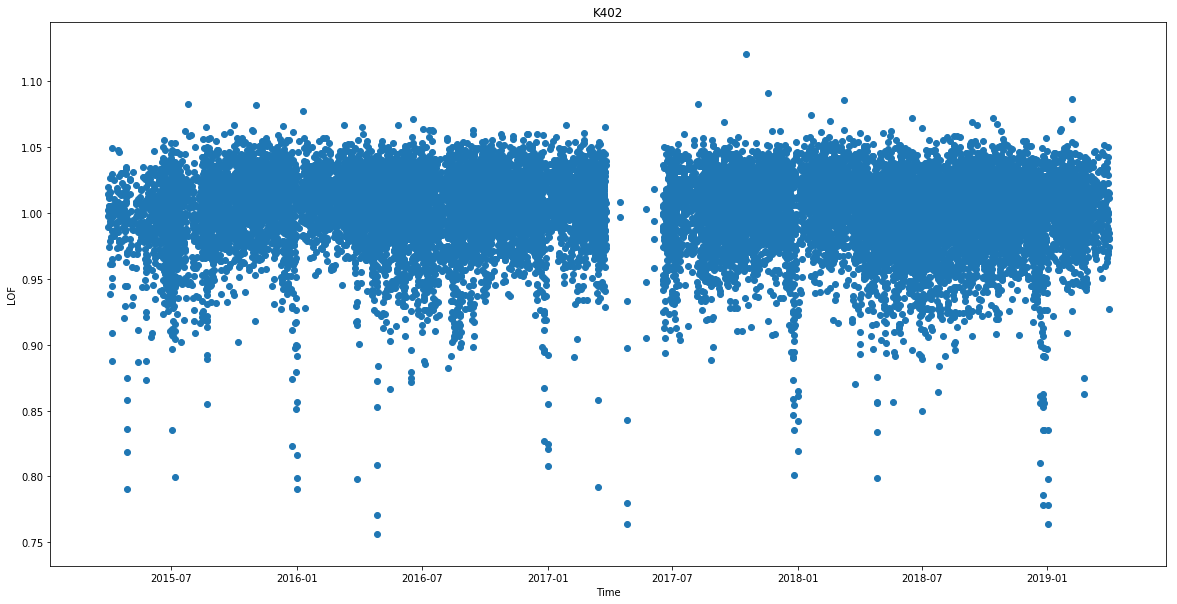

In [12]:
plt.figure(figsize=(20,10))
plt.scatter(K402.index, K402.lof)
plt.title('K402')
plt.xlabel('Time')
plt.ylabel('LOF')
plt.show()

## K305

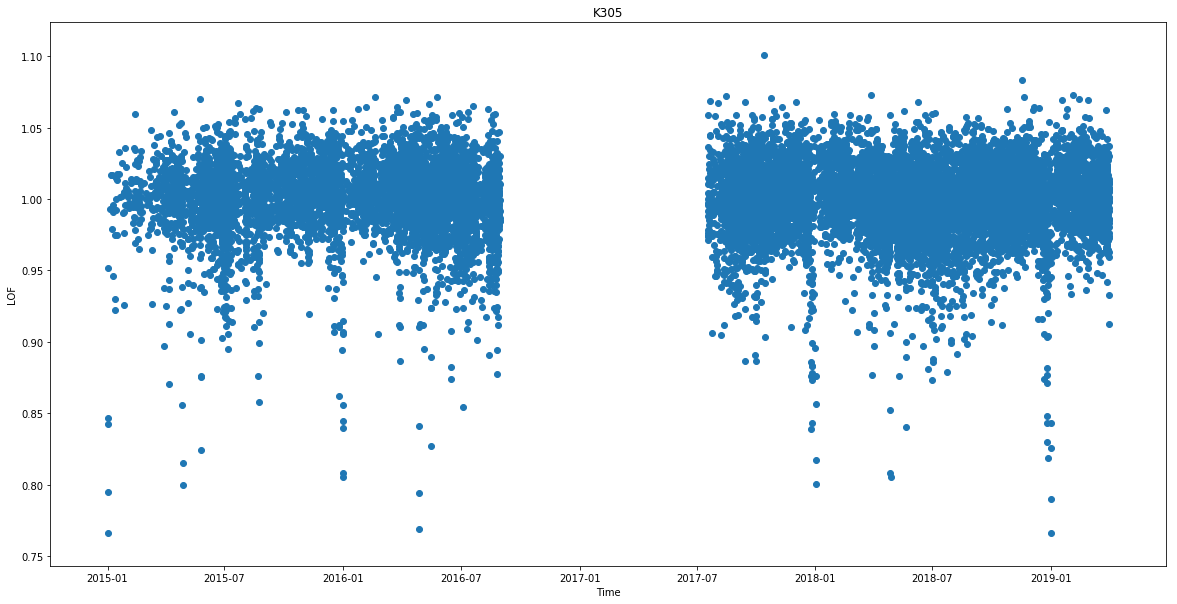

In [13]:
plt.figure(figsize=(20,10))
plt.scatter(K305.index, K305.lof)
plt.title('K305')
plt.xlabel('Time')
plt.ylabel('LOF')
plt.show()

In [14]:
dfs = [
    K302,
    K173,
    K414,
    K158,
    K402,
    K305
]
intersections = [
    'K302',
    'K173',
    'K414',
    'K158',
    'K402',
    'K305'    
]

In [15]:
def combine_dataframes(dfs,intersections):
    x = dfs[0].lof
    for df in range(len(dfs)):
        if df ==0:
            pass
        else:          
            frame = dfs[df].lof
            x = pd.concat([x, frame], axis=1)
    x.columns = intersections
    return x

In [16]:
dataframe = combine_dataframes(dfs,intersections)

In [17]:
dataframe.to_csv('./output_data/traffic_intersection_selection.csv')